In [1]:
import sys
sys.path.append(r'Classification\titanic\model_xgboost')

In [2]:
import pandas as pd
import yaml
import os
import pickle
import matplotlib.pyplot as plt
import dalex
from sklearn.inspection import PartialDependenceDisplay

In [3]:
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_xgboost\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

In [4]:
X_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_val'])   
    
y_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_val'])
    
params_ = {
        'X_val_feat_sel': X_val_feat_sel,
        'y_val_feat_sel': y_val_feat_sel,
        'model': config['model']['path'],
        'save_plot': config['save_reports']['path_plot'],
        'removed_cols': config['save_reports']['path_reports'],
        }

In [5]:
X_val = pd.read_parquet(params_['X_val_feat_sel'])
y_val = pd.read_parquet(params_['y_val_feat_sel'])    

In [6]:
model_path = os.path.join(
        config['init_path'],
        params_['model'],
        f"model_1.pkl")    
with open(model_path, "rb") as file:
            model = pickle.load(file)

In [7]:
X_val.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)

c:\Users\gustavo\anaconda3\envs\explain\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


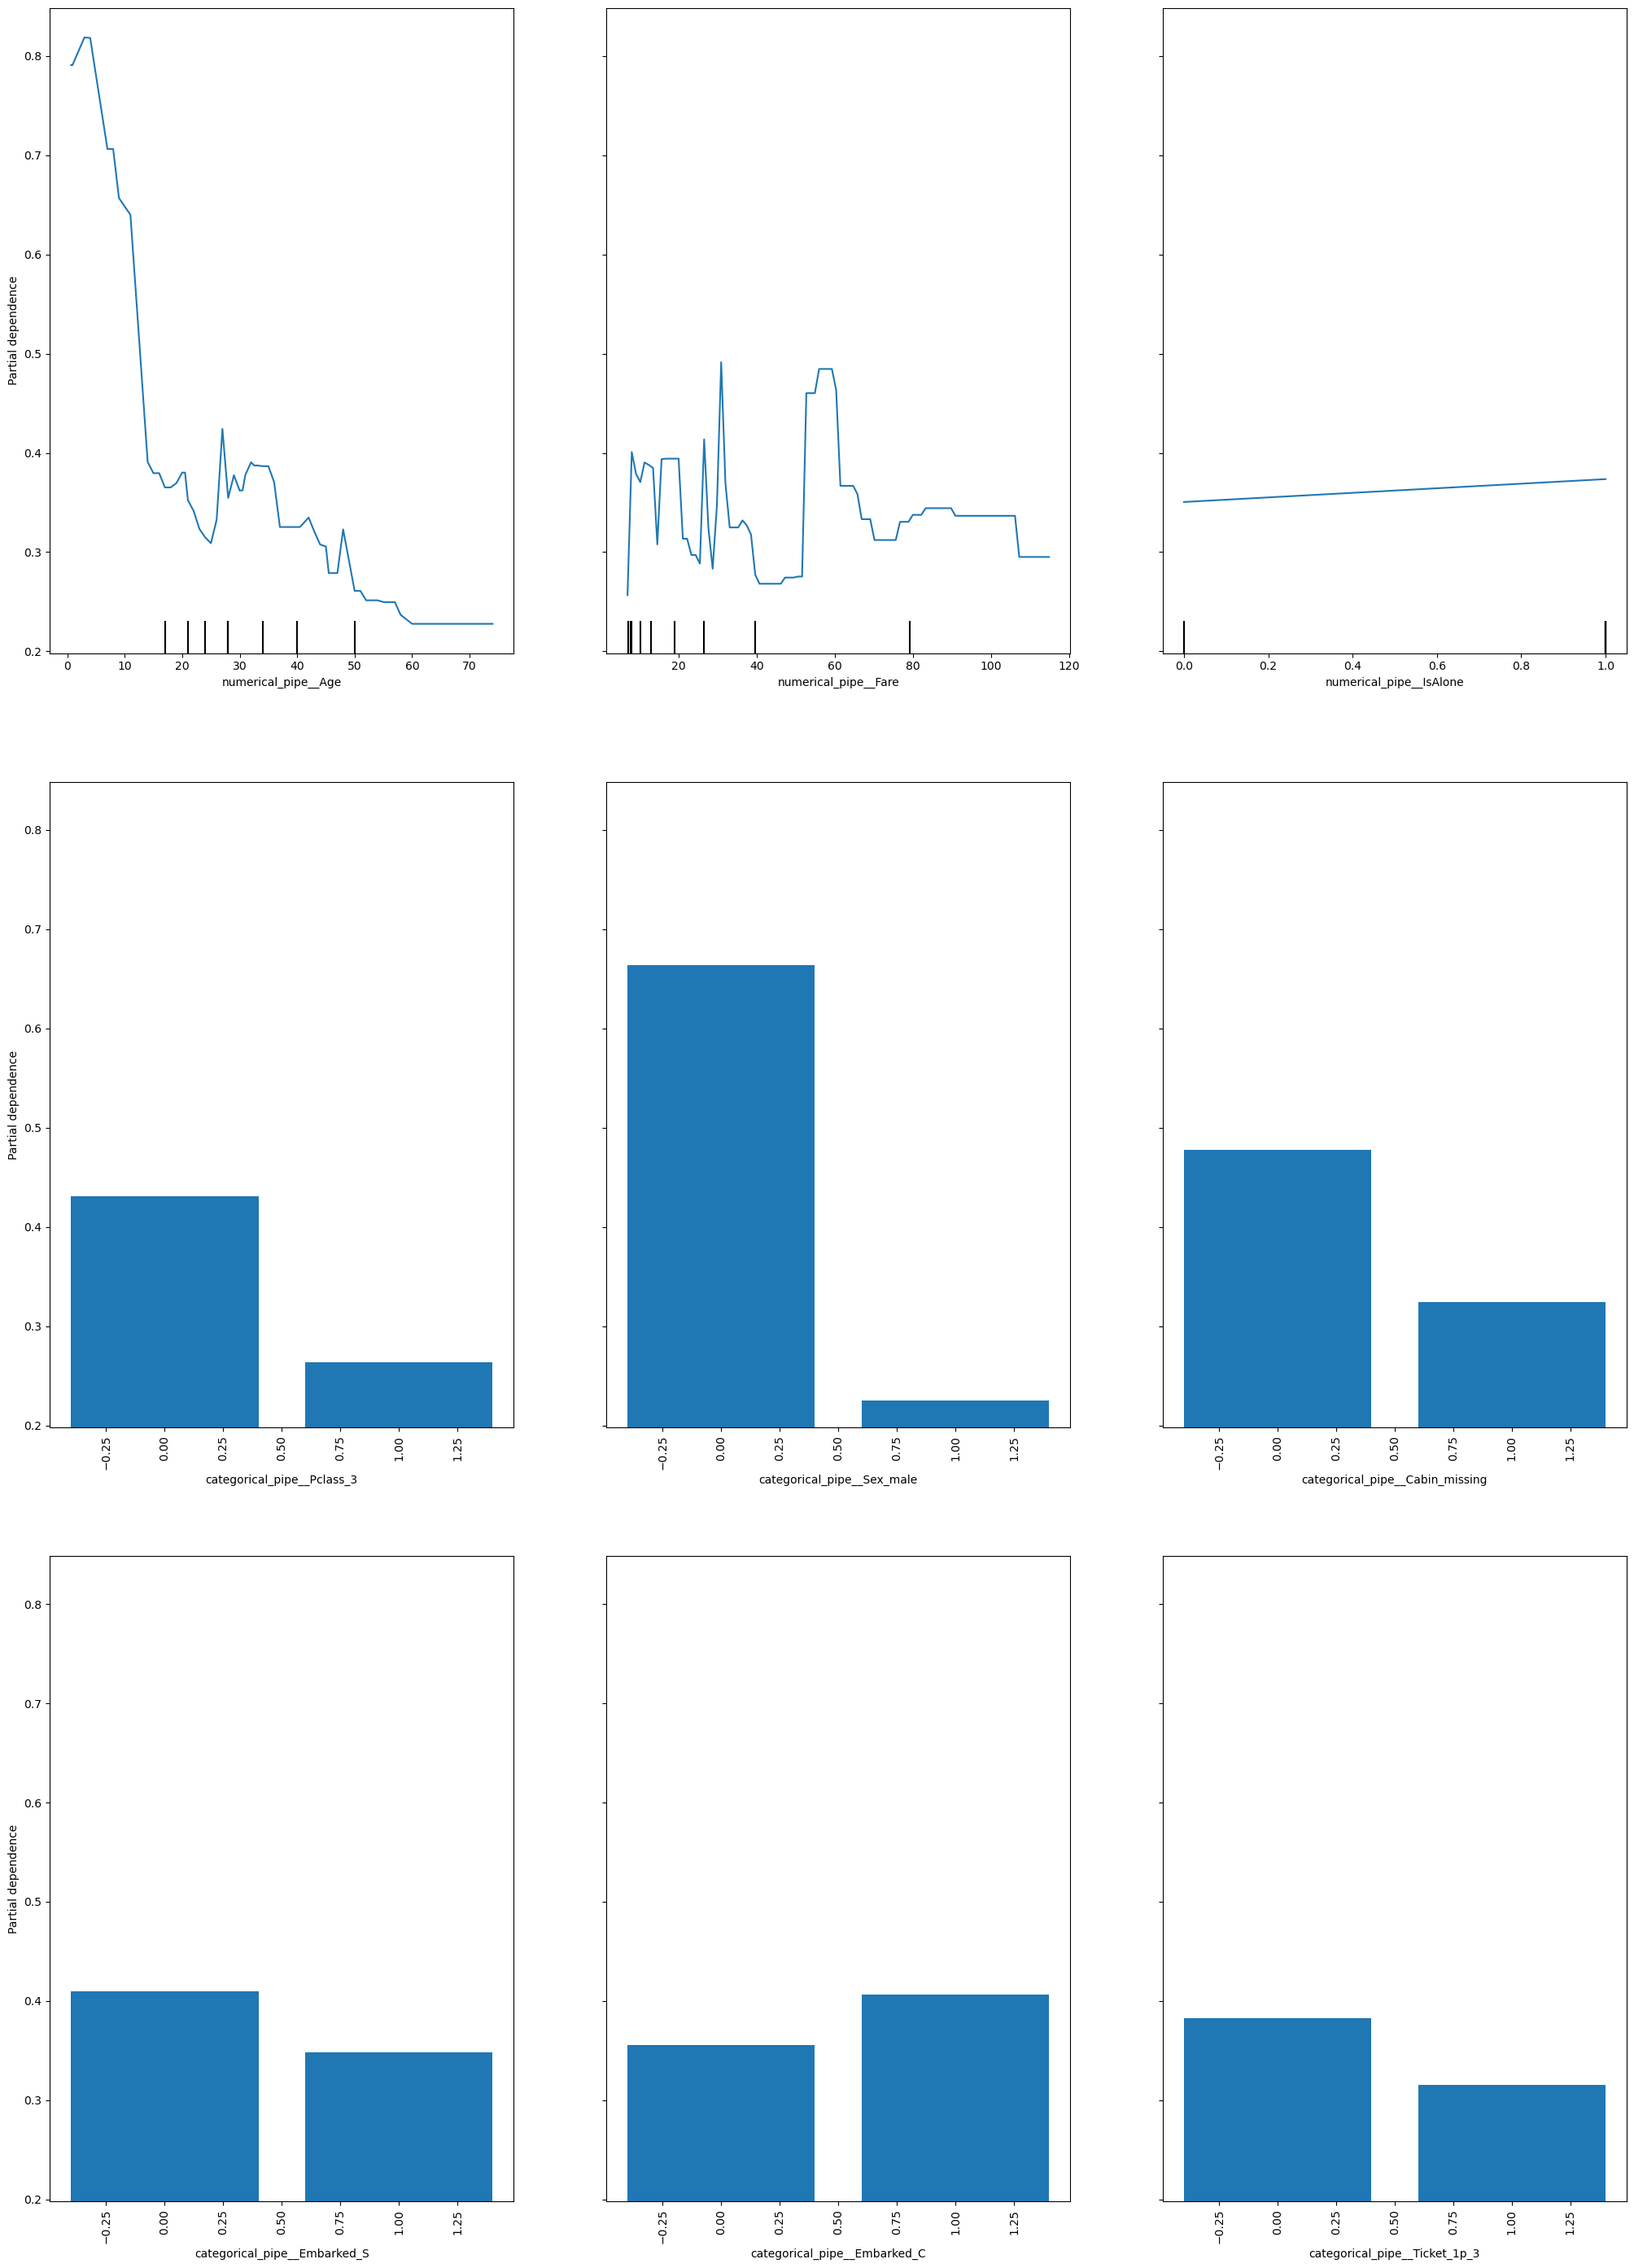

In [8]:
fig, ax = plt.subplots(figsize=(25, 35))
PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_val,
        features = X_val.columns.tolist(),
        categorical_features=X_val.columns[X_val.columns.str.contains('categorical_pipe')],
        random_state=23,
        ax=ax

    )

# Shap Values

In [9]:
explainer = dalex.Explainer(model, X_val, y_val, label="XGBoost Pipeline")

Preparation of a new explainer is initiated

  -> data              : 223 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 223 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001506F1C40E0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0102, mean = 0.368, max = 0.992
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.927, mean = -0.0178, max = 0.959
  -> model_info        : package sklearn

A new explainer has been created!


## Global Explanation

In [10]:
global_importance = explainer.model_parts()
global_importance.plot()

c:\Users\gustavo\anaconda3\envs\explain\Lib\site-packages\dalex\wrappers\_shap\checks.py:37: UserWarning:

`shap_explainer_type` parameter is None. Trying to determine the proper type: 
using KernelExplainer for <class 'sklearn.pipeline.Pipeline'>

Using 223 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/223 [00:00<?, ?it/s]

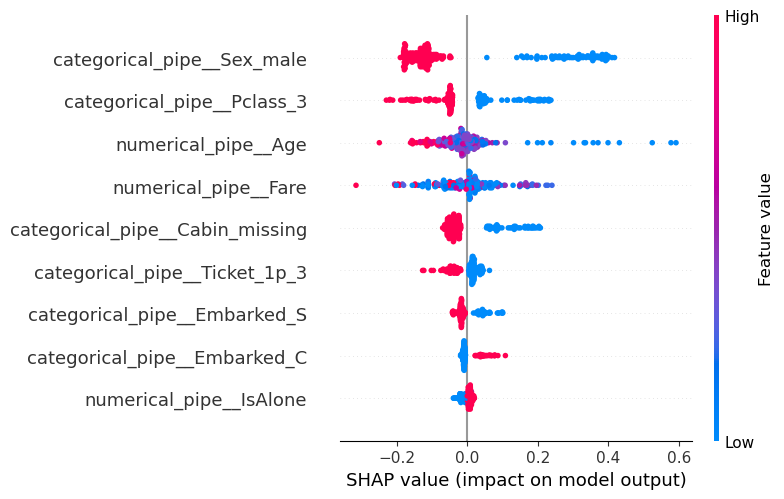

In [11]:
# Isso calcula o SHAP para várias observações e tira a média
shap_global = explainer.model_parts(X_val, type='shap_wrapper')
shap_global.plot()

In [12]:
observation = X_val.iloc[[0]] 

# 3. Calcular os SHAP values
shap_values = explainer.predict_parts(observation, type='shap')

# 4. Plotar o gráfico
shap_values.plot()